<a href="https://colab.research.google.com/github/DanielBrisch/SimpleNN/blob/main/RNA_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,8)

# criando dataset

In [ ]:
def get_linear_curve(x, w, b=0, noise_scale=0):
  return w * x + b + noise_scale * np.random.randn(x.shape[0])

In [ ]:
x = np.arange(-10, 30.1, 0.5)
Y = get_linear_curve(x, 1.8, 32, noise_scale=2.5)

In [ ]:
x[-1]

30.0

In [ ]:
x.shape, Y.shape

((81,), (81,))

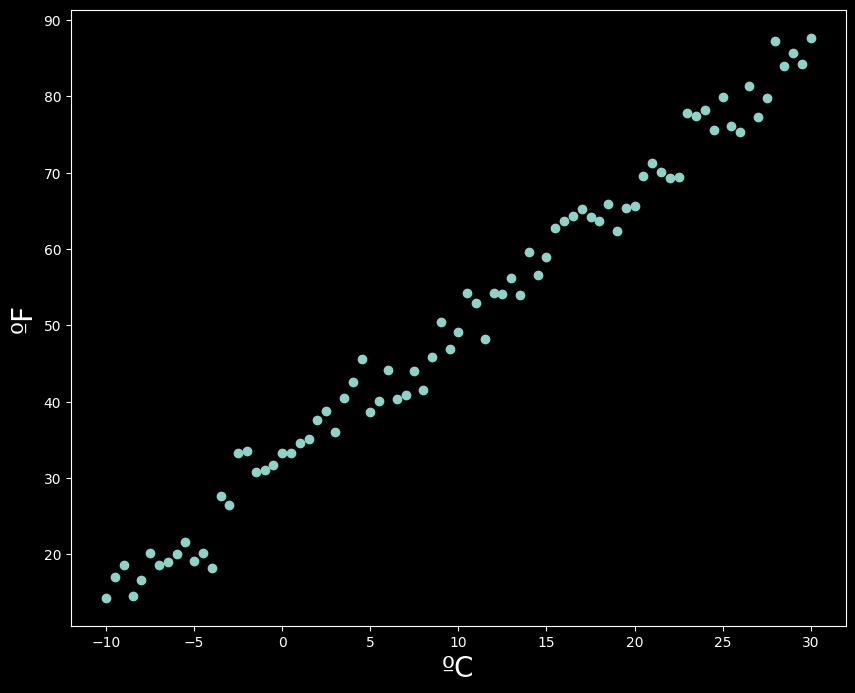

In [ ]:
plt.scatter(x, Y)
plt.xlabel('ºC', fontsize=20);
plt.ylabel('ºF', fontsize=20);

### Modelo

- Inicializando pesos e bias
- Feedforward
- Calcular a perda
- Backpropagation

In [ ]:
# iniciando

w = np.random.randn(1)
b = 0

In [ ]:
def forward(inputs, w, b):
  return w * inputs + b

In [ ]:
def mse(Y, y):
  return (Y-y)**2

In [ ]:
def backpropagation(inputs, outputs, targets, w, b, lr):
  dw = lr*(-2*inputs*(targets-outputs)).mean()
  db = lr*(-2*(targets-outputs)).mean()

  w -= dw
  b -= db
  return w, b

In [ ]:
def model_fit(inputs, target, w, b, epochs = 200, lr = 0.001):
  for epoch in range(epochs):
    outputs = forward(inputs, w, b)
    loss = np.mean(mse(target, outputs))
    w, b = backpropagation(inputs, outputs, target, w, b, lr)

    if (epoch+1 % 50 == 0):
      print(f'Epoch: [{(epoch+1)/{epochs}}] Loss: [{loss:.4f}]')
  return w, b

In [ ]:
x = np.arange(-10,30,2)
Y = get_linear_curve(x, w = 1.8, b = 32)

In [ ]:
# inicializacao

w = np.random.randn(1)
b = np.zeros(1)

In [ ]:
w, b = model_fit(x, Y, w, b, epochs=2000, lr=0.002)
print(f'w: {w[0]:3f}, b: {b[0]:.3f}')

w: 1.809336, b: 31.779


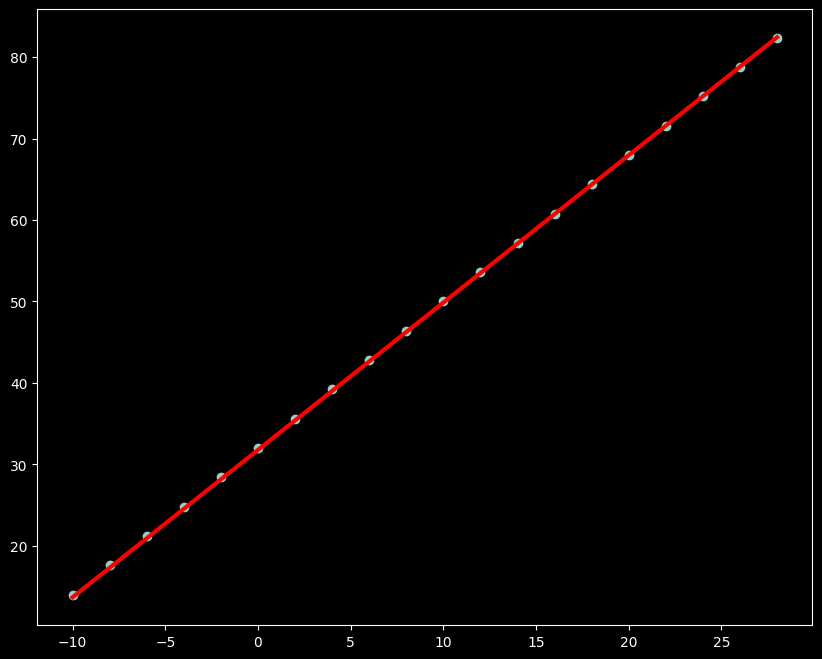

In [ ]:
plt.scatter(x, Y)
plt.plot(x, get_linear_curve(x, w, b), 'r', lw=3);